# **IE 423 TERM PROJECT**



In [ ]:
from google.colab import drive
drive.mount('/content/MyGoogleDrive')

Mounted at /content/MyGoogleDrive


In [ ]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install sklearn
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post5-py3-none-any.whl size=2950 sha256=5f09a22707d2345450494251cc859a50e3d8ebe51a2e45c5d2280f251fe53891
  Stored in directory: /root/.cache/pip/wheels/38/1f/8d/4f812c590e074c1e928f5cec67bf5053b71f38e2648739403a
Successfully built sklearn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, learning_curve, KFold, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import learning_curve
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

In [ ]:
import warnings #It's good to download warnings, to understand them better
warnings.filterwarnings('ignore')

## ***ANN MLP Classification***

In [ ]:
df1 = pd.read_csv('/content/MyGoogleDrive/MyDrive/breast_cancer.csv')

In [ ]:
df1.info()
#If it's object then it means that attribute is categorical, after that we should check our data and its type to start
#our analysis with more accurate data (Do we expect "BareNuclei" to be categorical or integer?, "Class" is normal
#categorical variable but it is shown as "int64", we should correct these first.)

#Also, "ID" is not descriptive so we should get rid of this, it doesn't do anything for our model too.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id number                 699 non-null    int64 
 1   clumpThickness            699 non-null    int64 
 2   UniformityofCellSize      699 non-null    int64 
 3   UniformityofCellShape     699 non-null    int64 
 4   MarginalAdhesion          699 non-null    int64 
 5   SingleEpithelialCellSize  699 non-null    int64 
 6   BareNuclei                699 non-null    object
 7   BlandChromatin            699 non-null    int64 
 8   NormalNucleoli            699 non-null    int64 
 9   Mitoses                   699 non-null    int64 
 10  Class                     699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [ ]:
df1.isnull().sum() #There are no N/A values in our dataset.

id number                   0
clumpThickness              0
UniformityofCellSize        0
UniformityofCellShape       0
MarginalAdhesion            0
SingleEpithelialCellSize    0
BareNuclei                  0
BlandChromatin              0
NormalNucleoli              0
Mitoses                     0
Class                       0
dtype: int64

In [ ]:
#In "Class" we have categorical variable which is 2 for benign, 4 for malignant.
#We need to create dummies and for that which means adding one more column and showing if it's bening or malignant that way.
df1 = pd.get_dummies(df1, columns=['Class'])

In [ ]:
df1.info() #In here, we can see that we distill Benign (2) and Malignant(4) classification.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id number                 699 non-null    int64 
 1   clumpThickness            699 non-null    int64 
 2   UniformityofCellSize      699 non-null    int64 
 3   UniformityofCellShape     699 non-null    int64 
 4   MarginalAdhesion          699 non-null    int64 
 5   SingleEpithelialCellSize  699 non-null    int64 
 6   BareNuclei                699 non-null    object
 7   BlandChromatin            699 non-null    int64 
 8   NormalNucleoli            699 non-null    int64 
 9   Mitoses                   699 non-null    int64 
 10  Class_2                   699 non-null    uint8 
 11  Class_4                   699 non-null    uint8 
dtypes: int64(9), object(1), uint8(2)
memory usage: 56.1+ KB


In [ ]:
df1.head()

,id number,clumpThickness,UniformityofCellSize,UniformityofCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Class_2,Class_4
0,1000025,5,1,1,1,2,1,3,1,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,1,0
2,1015425,3,1,1,1,2,2,3,1,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,1,0
4,1017023,4,1,1,3,2,1,3,1,1,1,0


In [ ]:
#Removing unnecessary "id" information for our analysis and deleting the "Class_2"
df2=df1.drop(['id number','Class_2'], axis=1, inplace=False)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   clumpThickness            699 non-null    int64 
 1   UniformityofCellSize      699 non-null    int64 
 2   UniformityofCellShape     699 non-null    int64 
 3   MarginalAdhesion          699 non-null    int64 
 4   SingleEpithelialCellSize  699 non-null    int64 
 5   BareNuclei                699 non-null    object
 6   BlandChromatin            699 non-null    int64 
 7   NormalNucleoli            699 non-null    int64 
 8   Mitoses                   699 non-null    int64 
 9   Class_4                   699 non-null    uint8 
dtypes: int64(8), object(1), uint8(1)
memory usage: 50.0+ KB


In [ ]:
#Updating the Class_4 name as "diagnosis" which shows us it is malignant or not
df2.rename(columns={"Class_4":"diagnosis"}, inplace=True)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   clumpThickness            699 non-null    int64 
 1   UniformityofCellSize      699 non-null    int64 
 2   UniformityofCellShape     699 non-null    int64 
 3   MarginalAdhesion          699 non-null    int64 
 4   SingleEpithelialCellSize  699 non-null    int64 
 5   BareNuclei                699 non-null    object
 6   BlandChromatin            699 non-null    int64 
 7   NormalNucleoli            699 non-null    int64 
 8   Mitoses                   699 non-null    int64 
 9   diagnosis                 699 non-null    uint8 
dtypes: int64(8), object(1), uint8(1)
memory usage: 50.0+ KB


In [ ]:
#Changing the "BareNuclei"'s type from object(which indicates it's a categorical variable) to numerical variable
df2['BareNuclei'] = df2['BareNuclei'].replace('?', pd.np.nan) #This is for "?" values in that column
df2['BareNuclei'] = df2['BareNuclei'].astype(float)
df2['BareNuclei'] = df2['BareNuclei'].fillna(0).astype(int)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   clumpThickness            699 non-null    int64
 1   UniformityofCellSize      699 non-null    int64
 2   UniformityofCellShape     699 non-null    int64
 3   MarginalAdhesion          699 non-null    int64
 4   SingleEpithelialCellSize  699 non-null    int64
 5   BareNuclei                699 non-null    int64
 6   BlandChromatin            699 non-null    int64
 7   NormalNucleoli            699 non-null    int64
 8   Mitoses                   699 non-null    int64
 9   diagnosis                 699 non-null    uint8
dtypes: int64(9), uint8(1)
memory usage: 50.0 KB


In [ ]:
df2['diagnosis'].value_counts()
#This shows us we have 458 benigns and 241 malignant cells.

0    458
1    241
Name: diagnosis, dtype: int64

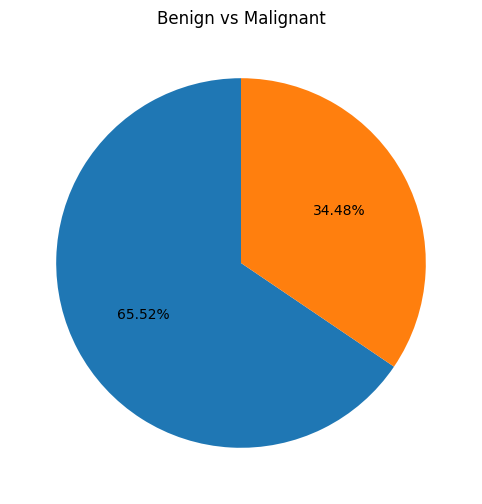

In [ ]:
plt.close('all')
plt.figure(figsize=(10,6))
plt.pie(df2['diagnosis'].value_counts(), autopct='%.2f%%', startangle=90)

plt.title("Benign vs Malignant")
plt.show()
#Blue shows us Benign, orange shows us Malignant

In [ ]:
df2.corr()

,clumpThickness,UniformityofCellSize,UniformityofCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,diagnosis
clumpThickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.589296,0.558428,0.535835,0.350034,0.716001
UniformityofCellSize,0.644913,1.000000,0.906882,0.705582,0.751799,0.684569,0.755721,0.722865,0.458693,0.817904
UniformityofCellShape,0.654589,0.906882,1.000000,0.683079,0.719668,0.704529,0.735948,0.719446,0.438911,0.818934
MarginalAdhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.665723,0.666715,0.603352,0.417633,0.696800
SingleEpithelialCellSize,0.521816,0.751799,0.719668,0.599599,1.000000,0.582904,0.616102,0.628881,0.479101,0.682785
BareNuclei,0.589296,0.684569,0.704529,0.665723,0.582904,1.000000,0.671545,0.572054,0.342795,0.817653
BlandChromatin,0.558428,0.755721,0.735948,0.666715,0.616102,0.671545,1.000000,0.665878,0.344169,0.756616
NormalNucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.572054,0.665878,1.000000,0.428336,0.712244
Mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.342795,0.344169,0.428336,1.000000,0.423170
diagnosis,0.716001,0.817904,0.818934,0.696800,0.682785,0.817653,0.756616,0.712244,0.423170,1.000000


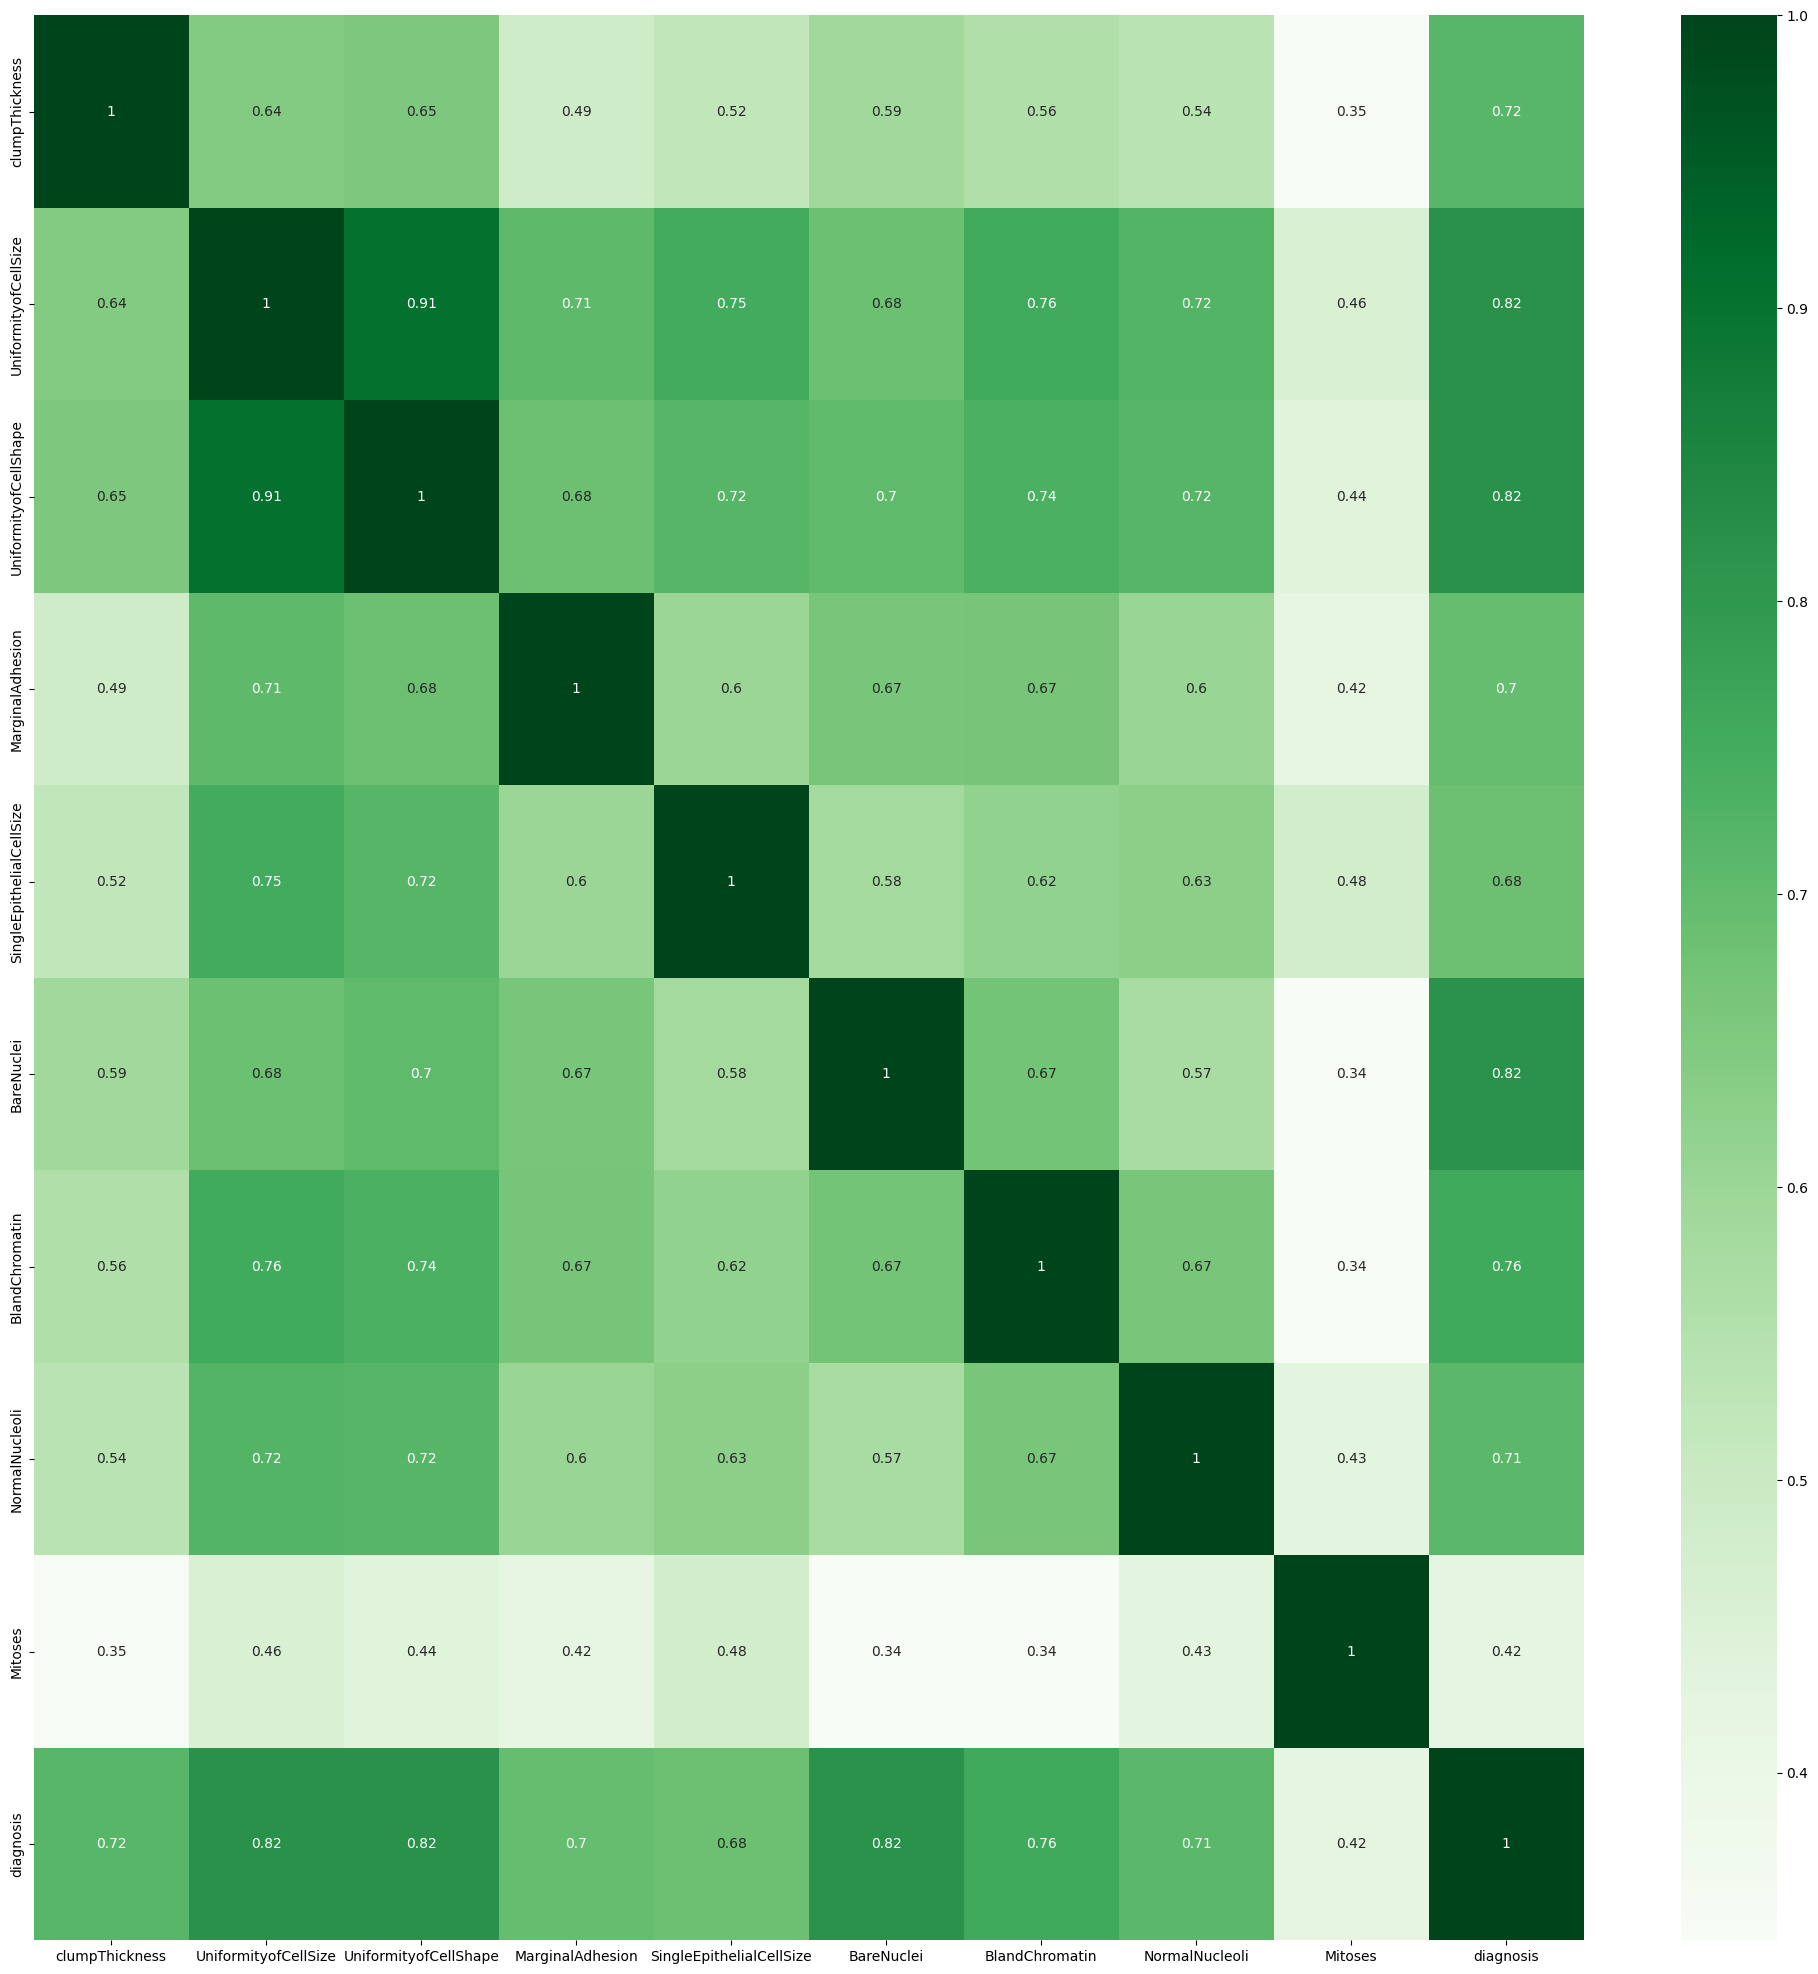

In [ ]:
plt.close('all')
plt.figure(figsize=(25,25))
sns.heatmap(df2.corr(),cbar=True,annot=True,cmap='Greens')
plt.show()

In [ ]:
#Train-Test Split and Scaling
X = df2.drop('diagnosis', axis=1)
y = df2['diagnosis']

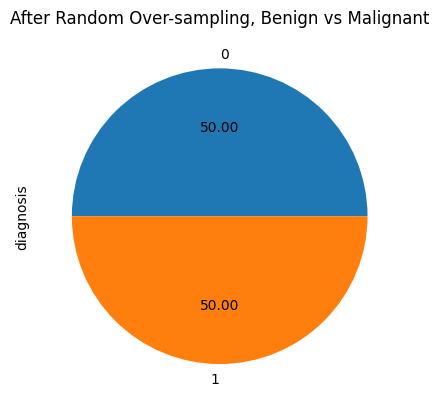

In [ ]:
ros = RandomOverSampler(sampling_strategy="not majority") #"not majority" parameter oversamples the minority class.
X_res, y_res = ros.fit_resample(X, y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("After Random Over-sampling, Benign vs Malignant")

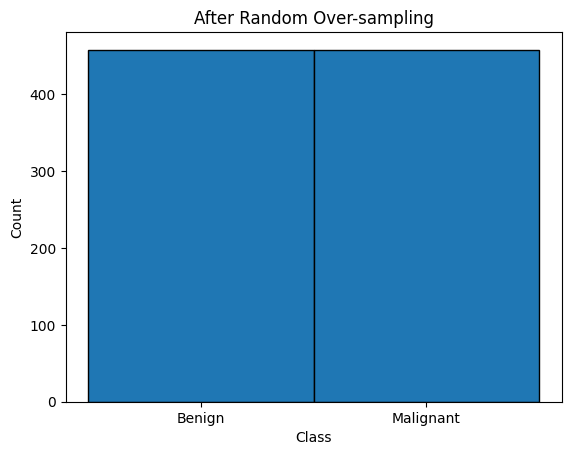

In [ ]:
fig, ax = plt.subplots()
ax.hist(y_res, bins=2, edgecolor='black')
ax.set_xticks([0.25, 0.75])
ax.set_xticklabels(['Benign', 'Malignant'])
ax.set_xlabel('Class')
ax.set_ylabel('Count')
ax.set_title('After Random Over-sampling')
plt.show()

In [ ]:
 y_res.value_counts()

0    458
1    458
Name: diagnosis, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42) #Since we did random oversampling we used X_res, y_res instead of X and y.

Xscaler = StandardScaler() #We don't need to do scaling on y because it is already scaled between 0 and 1.
X_train_scaled = Xscaler.fit_transform(X_train) #We fit it into the training set.
X_test_transformed = Xscaler.transform(X_test) #Transforming it with test set

In our article, they use 10-fold cross validation technique, the below code indicates that;

In [ ]:
"""
layer_list = [(10, 10), (20, 20), (30, 30), (40, 40), (50, 50)]

for layer in layer_list:
    model = MLPClassifier(hidden_layer_sizes=layer, activation='relu', solver='adam', max_iter=100, random_state=42)

    kf = KFold(n_splits=10)
    scores = cross_val_score(model, X_train_scaled, y_train, cv=kf)
    print(layer, 'CV_Score:', scores.mean())

    train_sizes, train_scores, val_scores = learning_curve(model, X_train_scaled, y_train, cv=kf)
    plt.close('all')
    plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', label='Training score')
    plt.plot(train_sizes, val_scores.mean(axis=1), 'x-', label='Validation score')
    plt.title(layer)
    plt.legend()
    plt.show()

"""

"\nlayer_list = [(10, 10), (20, 20), (30, 30), (40, 40), (50, 50)] \n\nfor layer in layer_list:\n    model = MLPClassifier(hidden_layer_sizes=layer, activation='relu', solver='adam', max_iter=100, random_state=42)\n\n    kf = KFold(n_splits=10)\n    scores = cross_val_score(model, X_train_scaled, y_train, cv=kf)\n    print(layer, 'CV_Score:', scores.mean())\n\n    train_sizes, train_scores, val_scores = learning_curve(model, X_train_scaled, y_train, cv=kf)\n    plt.close('all')\n    plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', label='Training score')\n    plt.plot(train_sizes, val_scores.mean(axis=1), 'x-', label='Validation score')\n    plt.title(layer)\n    plt.legend()\n    plt.show()\n    \n"

To find better result we used "Hyperparameter Tuning". Below code shows us the better CV_Scores instead of article's 10-fold technique we can use the below code for better k-fold result between 2 and 11.

In addition to that, in our article they did not mention any specific layer_list however we tried some random layer_list examples to find better results.

(10, 10) Fold: 19 CV_Score: 0.9700973080474464


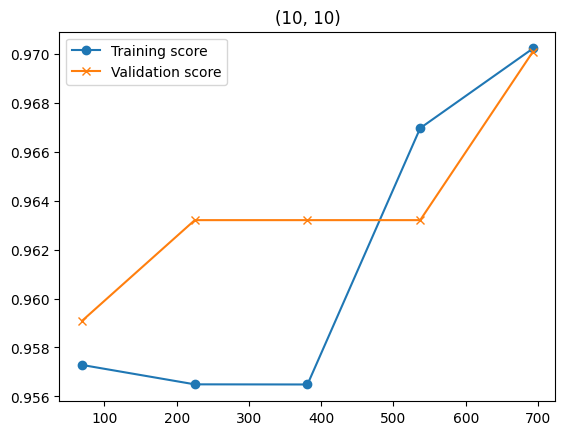

(20, 20) Fold: 6 CV_Score: 0.9699453551912568


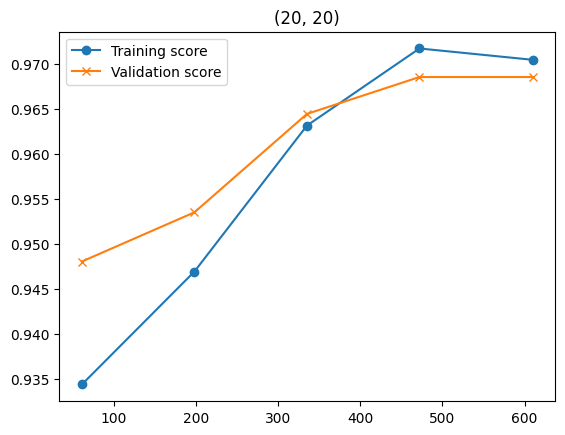

(30, 30) Fold: 14 CV_Score: 0.9768038565208375


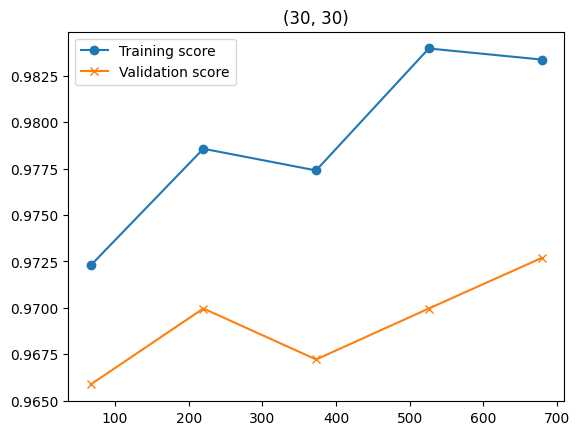

(40, 40) Fold: 14 CV_Score: 0.9808729006842213


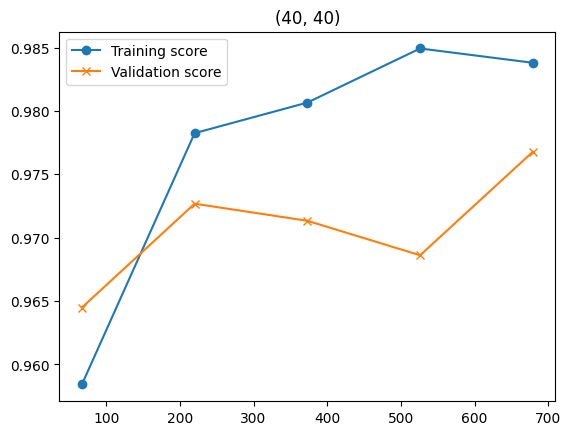

(50, 50) Fold: 14 CV_Score: 0.9794992743105949


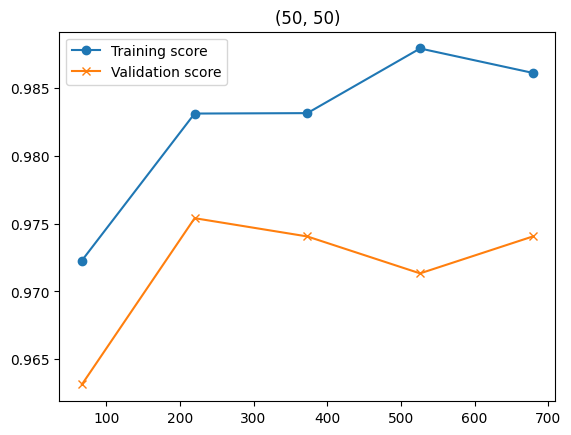

(100, 200, 4) Fold: 17 CV_Score: 0.9795734361397834


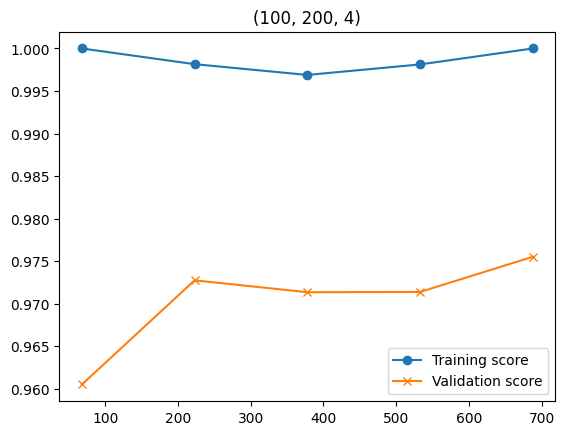

In [ ]:
#layer_list=[(2),(2,2),(3,3),(64,32)]
#layer_list=[(2), (5,5), (3,3,3), (10,5,3), (50,25,10)]

layer_list = [(10, 10), (20, 20), (30, 30), (40, 40), (50, 50), (100,200,4)] #In terms of these 3 different layer_list the one which improves our model is, this one.

for layer in layer_list:
  model = MLPClassifier(hidden_layer_sizes=layer, activation='relu', solver='adam', max_iter=100, random_state=42)

  score_means_list=[]

  for i in range(2,20): #In here, we tried different k-folds until 50, 40, 30 and 20 seperately. But in each try we see that our highest CV_scores are in between 2 and 20. After 20 folds we didn't see any improvement.
    kf = KFold(n_splits=i) #When n-splits equal to "i" it tries to find the best k-fold value and gives the higher "CV_Score" values.In article, they used 10-fold but above part we see that finding dynamic k-fold are better.
    scores = cross_val_score(model, X_train_scaled, y_train, cv=kf)
    #print("Mean cross-validation score:", scores.mean())
    score_means_list.append(scores.mean())

  print(layer, 'Fold:', np.argmax(score_means_list)+2, 'CV_Score:', np.max(score_means_list))

  """plt.close('all')
  plt.plot(range(2, 11), score_means_list, marker='o')
  plt.xlabel('Fold')
  plt.ylabel('Score')
  plt.title(layer)
  plt.show()"""

  train_sizes, train_scores, val_scores = learning_curve(model, X_train_scaled, y_train, cv=np.argmax(score_means_list)+2)
  plt.close('all')
  plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', label='Training score')
  plt.plot(train_sizes, val_scores.mean(axis=1), 'x-', label='Validation score')
  plt.title(layer)
  plt.legend()
  plt.show()

In [ ]:
#Model Testing and Predictions

# Predicting on the test set
model = MLPClassifier(hidden_layer_sizes=(20,20), activation='relu', solver='adam', max_iter=100, random_state=42)

model.fit(X_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=(20, 20), max_iter=100, random_state=42)

In [ ]:
y_pred = model.predict(X_test_transformed)

# Evaluating the model
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[90  3]
 [ 2 89]]


We have 916 rows (with over-sampling) in our data, when split it for training (80%) and testing (20%). In the above, confusion matrix we can see that in total 184 data rows are tested. We can understand that testing percentage is succesfuly done.

In [ ]:
TN = cm[0, 0] # Get True Negatives, save as TN
FP = cm[0, 1] # Get False Positives, save as FP
FN = cm[1, 0] # Get False Negatives, save as FN
TP = cm[1, 1] # Get True Positives, save as TP

print("True negatives:", TN)
print("False positives:", FP)
print("False negatives:", FN)
print("True positives:", TP)

True negatives: 90
False positives: 3
False negatives: 2
True positives: 89


In [ ]:
Accuracy_ANN = (TP + TN) / (TP + TN + FP + FN)
print(Accuracy_ANN)

0.9728260869565217


In [ ]:
Precision_ANN= (TP) / (TP+FP)
print(Precision_ANN)

0.967391304347826


In [ ]:
Recall_ANN= (TP) / (TP+FN)
print(Recall_ANN)

0.978021978021978


In [ ]:
F1_Score_ANN= ((2 * Precision_ANN * Recall_ANN) / (Precision_ANN + Recall_ANN))
print(F1_Score_ANN)

0.9726775956284153


Since we have 9 features as an input and if we want to check our model, we should try some values from our dataset.

***Reminder! Our 1st row was column names and we tidied the data as a first step in our model***

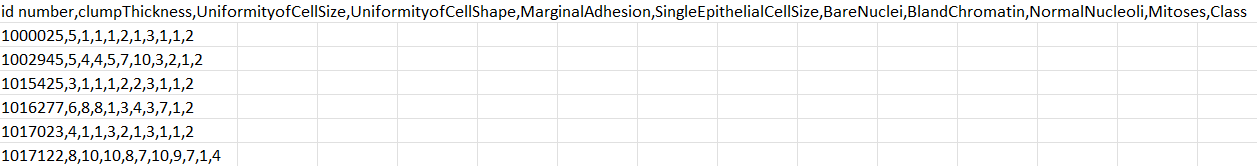

In [ ]:
#First malignant case our .csv file which is row 7th
new_pred1=[[8,10,10,8,7,10,9,7,1]]
new_pred1_scaled = Xscaler.transform(new_pred1)
pred1 = model.predict(new_pred1_scaled)
print(pred1)

[1]


In [ ]:
#First benign case in the .csv file which is row 2th
new_pred2=[[5,1,1,1,2,1,3,1,1]]
new_pred2_scaled = Xscaler.transform(new_pred2)
pred2 = model.predict(new_pred2_scaled)
print(pred2)

[0]


**Trying another hidden layer size to check overfitting;**

In [ ]:
model2 = MLPClassifier(hidden_layer_sizes=(100,200,4), activation='relu', solver='adam', max_iter=100, random_state=42)
model2.fit(X_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=(100, 200, 4), max_iter=100, random_state=42)

In [ ]:
y_pred_overfitting = model2.predict(X_test_transformed)

# Evaluating the model
cm = confusion_matrix(y_test, y_pred_overfitting)
print(cm)

[[90  3]
 [ 1 90]]


In [ ]:
acc_ANN_overfitting = accuracy_score(y_test, y_pred)
print('Accuracy:', acc_ANN_overfitting)

Accuracy: 0.9728260869565217


# ***SVM Classification***

In our case, data cannot seperated linearly. We have more than 2 variables, however with "Kernel" we can work with linearly inseparable data. With the help of Kernel we can see the data in 2D dimensions as follows. After that we can start classifying.

In [ ]:
X = df2[['clumpThickness','UniformityofCellSize','UniformityofCellShape','MarginalAdhesion','SingleEpithelialCellSize','BareNuclei','BlandChromatin','NormalNucleoli','Mitoses']]
y = df2['diagnosis']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=25)

In [ ]:
Xscaler = StandardScaler()

In [ ]:
X_train_scaled = Xscaler.fit_transform(X_train)
X_test_transformed = Xscaler.transform(X_test)

In [ ]:
model = SVC(C=10, gamma='auto', kernel='rbf') #With smaller C values misclassification increases but with greater C values model gets more strict about the classification.
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_transformed)
cm_SVM = confusion_matrix(y_test, y_pred)
print(cm_SVM)

[[ 79   4]
 [  0 101]]


In [ ]:
TN_SVM = cm_SVM[0, 0] # Get True Negatives, save as TN
FP_SVM = cm_SVM[0, 1] # Get False Positives, save as FP
FN_SVM = cm_SVM[1, 0] # Get False Negatives, save as FN
TP_SVM = cm_SVM[1, 1] # Get True Positives, save as TP

print("True negatives:", TN_SVM)
print("False positives:", FP_SVM)
print("False negatives:", FN_SVM)
print("True positives:", TP_SVM)

True negatives: 79
False positives: 4
False negatives: 0
True positives: 101


In [ ]:
Accuracy_SVM = accuracy_score(y_test, y_pred)
print("Accuracy:", Accuracy_SVM)

'''
#These two values are the same but we can find the accuracy with two different methods
Accuracy_SVM = (TP_SVM + TN_SVM) / (TP_SVM + TN_SVM + FP_SVM + FN_SVM)
print(Accuracy_SVM)
'''

Accuracy: 0.9782608695652174


'\n#These two values are the same but we can find the accuracy with two different methods\nAccuracy_SVM = (TP_SVM + TN_SVM) / (TP_SVM + TN_SVM + FP_SVM + FN_SVM)\nprint(Accuracy_SVM)\n'

In [ ]:
Precision_SVM= (TP_SVM) / (TP_SVM+FP_SVM)
print(Precision_SVM)

0.9619047619047619


In [ ]:
Recall_SVM= (TP_SVM) / (TP_SVM+FN_SVM)
print(Recall_SVM)

1.0


In [ ]:
F1_Score_SVM= ((2 * Precision_SVM * Recall_SVM) / (Precision_SVM + Recall_SVM))
print(F1_Score_SVM)

0.9805825242718447


In [ ]:
y_pred.sum()

105

In [ ]:
y_test.sum()

101

In [ ]:
C = [0.01,1,5,10,20] #When C value increses our model fits better but we can also encounter overfitting problem.

TPR_list = []
FPR_list = []
FNR_list = []
ACC_list = []

for i in C:
    model = SVC(C=i, gamma='auto', kernel='rbf')
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_transformed)
    cm_SVM = confusion_matrix(y_test, y_pred)

    TN_SVM = cm_SVM[0, 0]  # Get True Negatives, save as TN
    FP_SVM = cm_SVM[0, 1]  # Get False Positives, save as FP
    FN_SVM = cm_SVM[1, 0]  # Get False Negatives, save as FN
    TP_SVM = cm_SVM[1, 1]  # Get True Positives, save as TP

    TPR_SVM = TP_SVM / (TP_SVM + FN_SVM)  # TPR: Higher is better
    FPR_SVM = FP_SVM / (FP_SVM + TN_SVM)  # FPR: Lower is better
    FNR_SVM = FN_SVM / (FN_SVM + TP_SVM)  # FNR: Lower is better
    ACC_SVM = (TP_SVM + TN_SVM) / (TP_SVM + TN_SVM + FP_SVM + FN_SVM)  # ACC: Higher is better

    TPR_list.append(TPR_SVM)
    FPR_list.append(FPR_SVM)
    FNR_list.append(FNR_SVM)
    ACC_list.append(ACC_SVM)


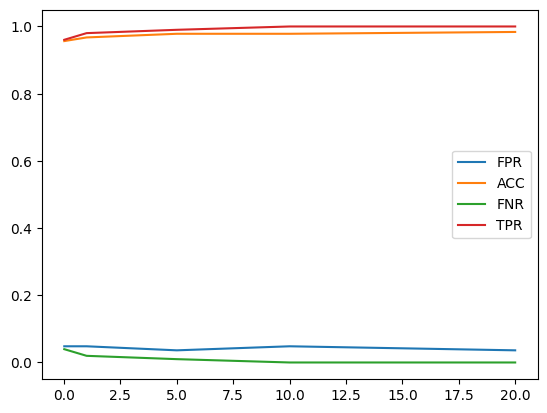

In [ ]:
plt.close('all')
plt.plot(C, FPR_list, label='FPR')
plt.plot(C, ACC_list, label='ACC')
plt.plot(C, FNR_list, label='FNR')
plt.plot(C, TPR_list, label='TPR')
plt.legend()
plt.show()

Below code indicates 10-fold, just like our article;

In [ ]:
kf = KFold(n_splits=10) #In article, we know that they use 10 folds...
scores = cross_val_score(model, X_train_scaled, y_train, cv=kf)
print("Cross-validation scores:", scores)

Cross-validation scores: [0.95945946 0.98648649 0.94520548 0.97260274 0.94520548 0.94520548
 0.95890411 0.95890411 0.94520548 0.98630137]


In [ ]:
print("Mean cross-validation score:", scores.mean()) #We take the mean of these cross validation scores to find the model's "Mean Cross-Validation Score"

Mean cross-validation score: 0.9603480192521289


Below code indicates best k-fold, until 10-folds;

In [ ]:
#Trying all of the k-fold's CV-Scores, between [2,11) )
score_means_list=[]
for i in range(2,11):
  kf = KFold(n_splits=i)
  scores = cross_val_score(model, X_train_scaled, y_train, cv=kf)
  print("Mean cross-validation score:", scores.mean())
  score_means_list.append(scores.mean())

Mean cross-validation score: 0.9617486338797814
Mean cross-validation score: 0.9617486338797815
Mean cross-validation score: 0.9658469945355191
Mean cross-validation score: 0.9658279750256267
Mean cross-validation score: 0.9631147540983606
Mean cross-validation score: 0.9644557823129253
Mean cross-validation score: 0.9603738652651695
Mean cross-validation score: 0.9617083207869115
Mean cross-validation score: 0.9603480192521289


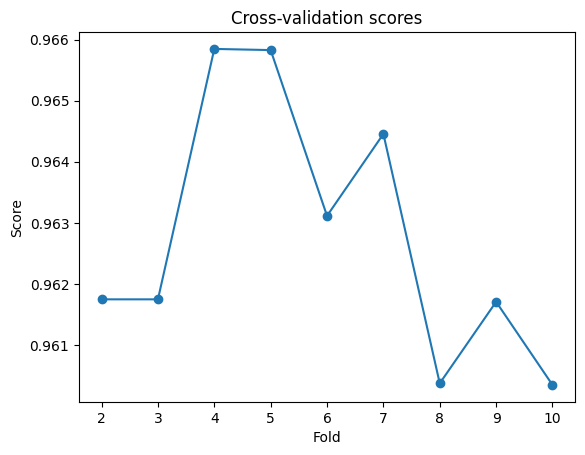

In [ ]:
#Plotting all of these possible k-folds CV_Score values
plt.close('all')
plt.plot(range(2, 11), score_means_list, marker='o')
plt.xlabel('Fold')
plt.ylabel('Score')
plt.title('Cross-validation scores')
plt.show()

Understanding that if overfitting or underfitting happened:

In [ ]:
train_sizes, train_scores, val_scores = learning_curve(model, X_train_scaled, y_train, cv=10)

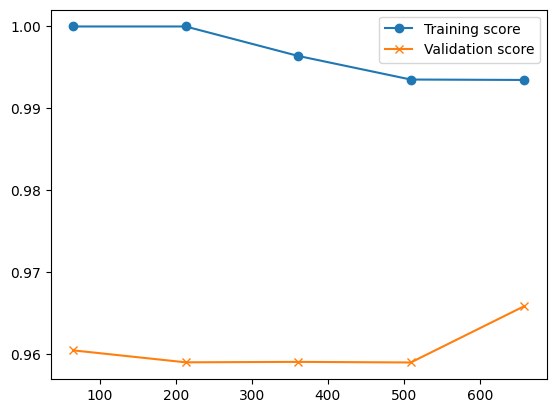

In [ ]:
plt.close('all')
plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', label='Training score')
plt.plot(train_sizes, val_scores.mean(axis=1), 'x-', label='Validation score')
plt.legend()
plt.show()

In [ ]:
#PREDICTING 3 DIFFERENT DATA FROM OUR DATASET
new_pred1=[[5,1,1,1,2,1,3,1,1]] #Observation 1, should be 0=Benign
new_pred1_scaled = Xscaler.transform(new_pred1)
pred1 = model.predict(new_pred1_scaled)
print(pred1)

new_pred2=[[8,10,10,8,7,10,9,7,1]] #Observation 8495, should be 1=Malignant
new_pred2_scaled = Xscaler.transform(new_pred2)
pred2 = model.predict(new_pred2_scaled)
print(pred2)

new_pred3=[[6,10,2,8,10,2,7,8,10]] #Observation 73, should be 1=Malignant
new_pred3_scaled = Xscaler.transform(new_pred3)
pred3 = model.predict(new_pred3_scaled)
print(pred3)

[0]
[1]
[1]


**Below section, is for understanding of SVM and Kernel relations ...**

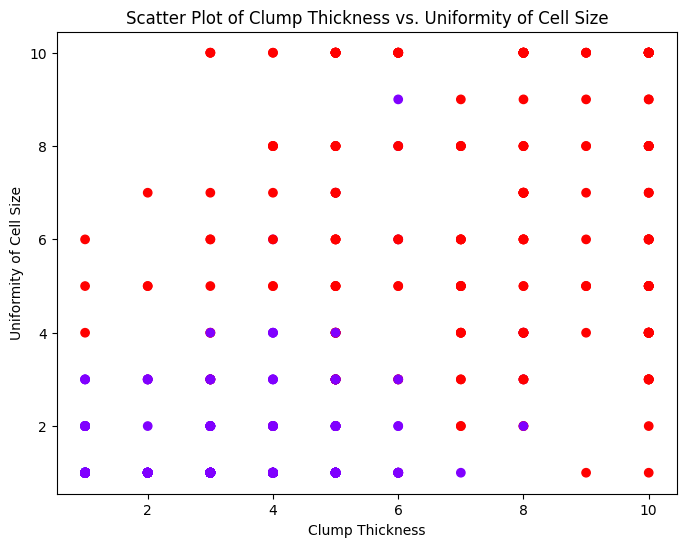

In [ ]:
#We the same code but different feature names we can create such graphs as follows...
plt.figure(figsize=(8, 6))
plt.scatter(df2['clumpThickness'], df2['UniformityofCellSize'], c=df2['diagnosis'], cmap='rainbow')
plt.xlabel('Clump Thickness')
plt.ylabel('Uniformity of Cell Size')
plt.title('Scatter Plot of Clump Thickness vs. Uniformity of Cell Size')
plt.show()

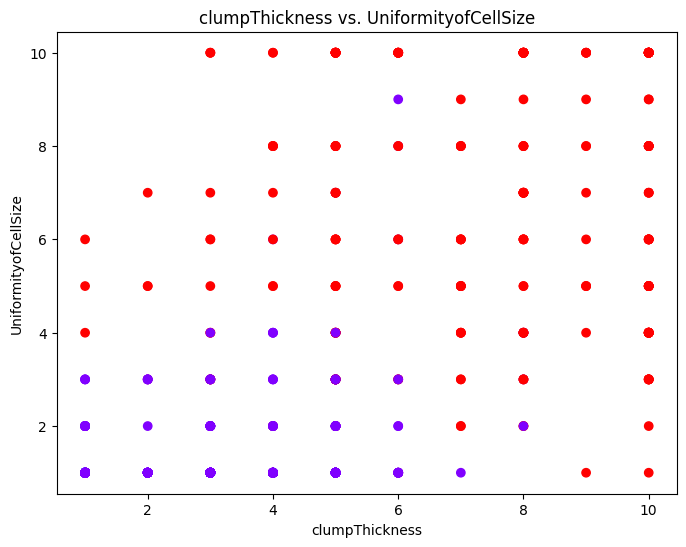

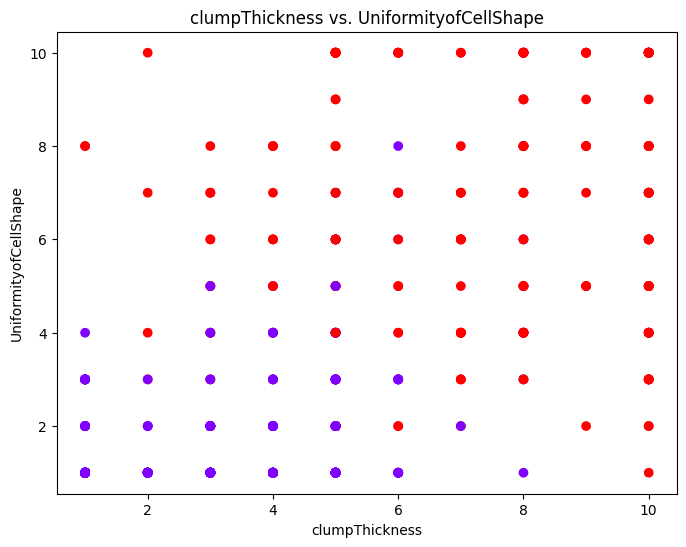

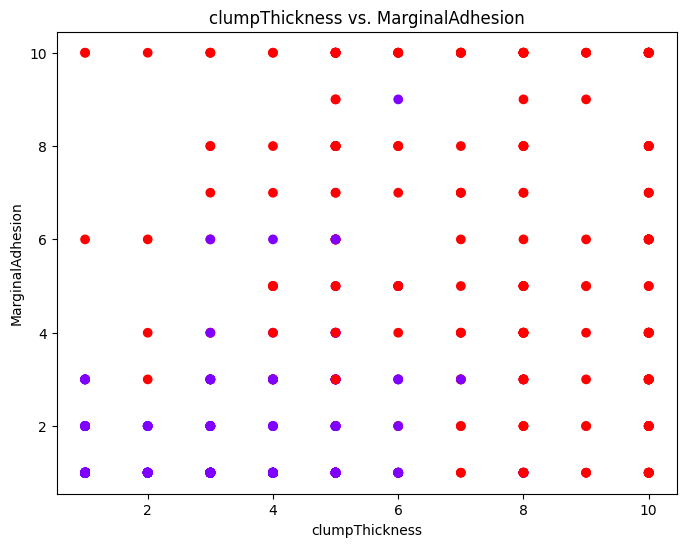

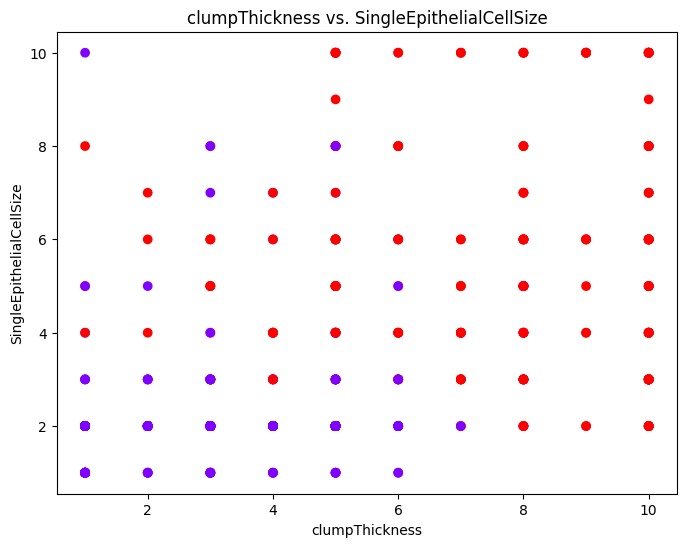

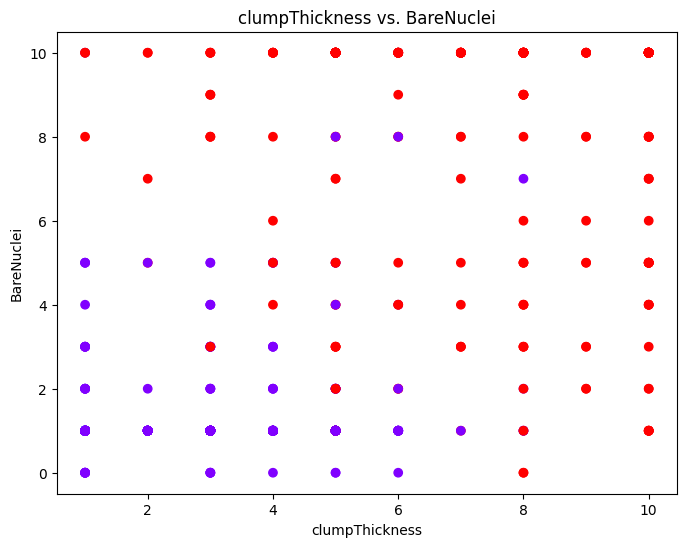

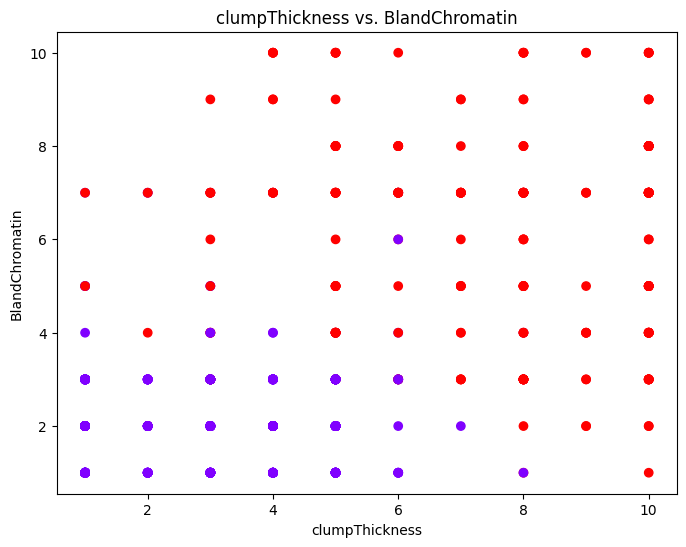

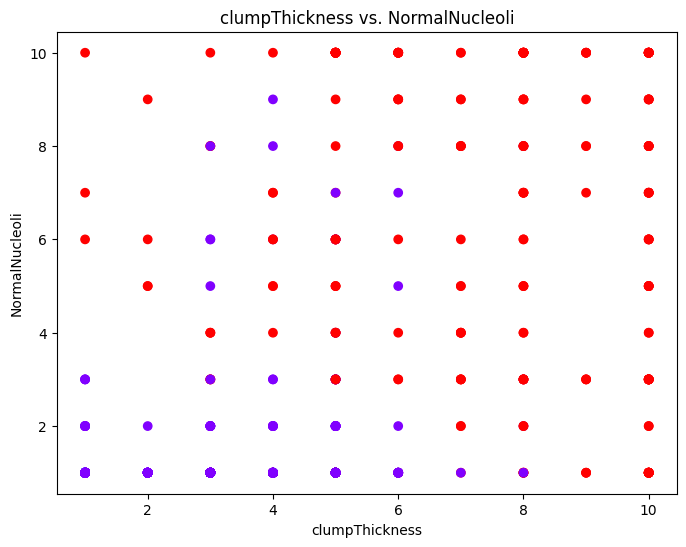

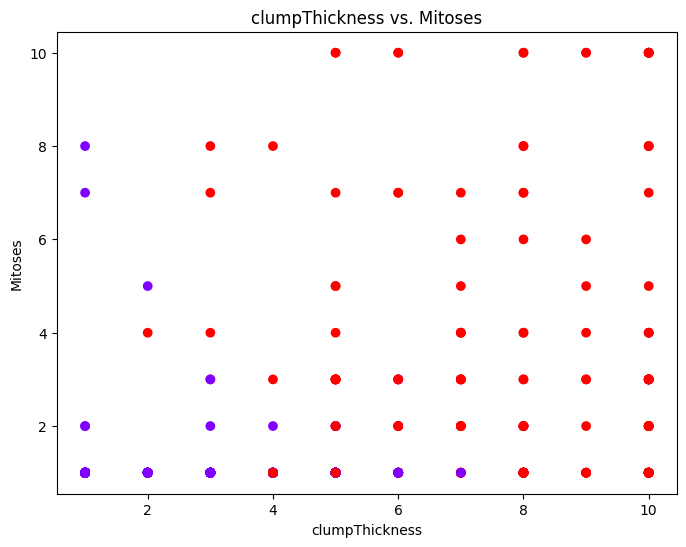

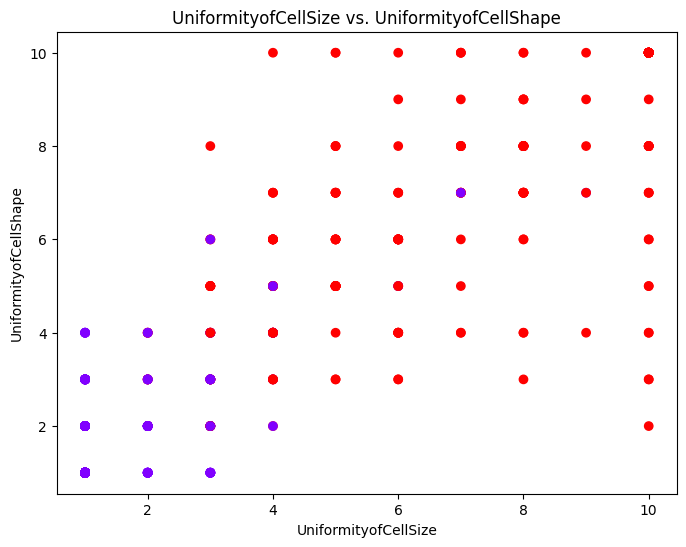

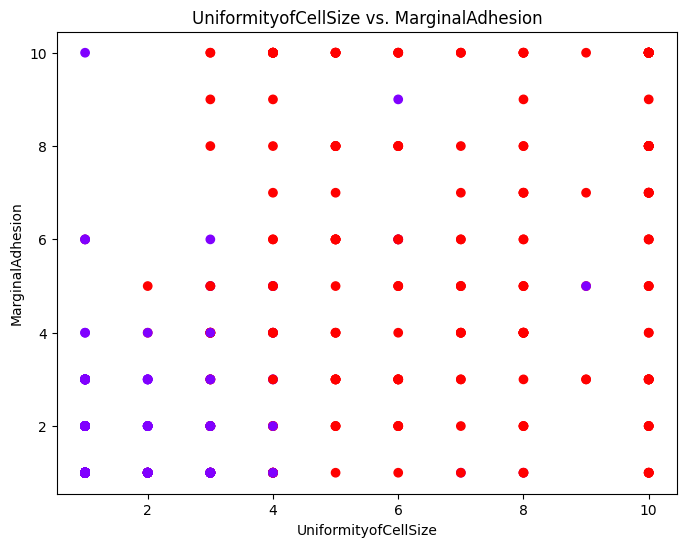

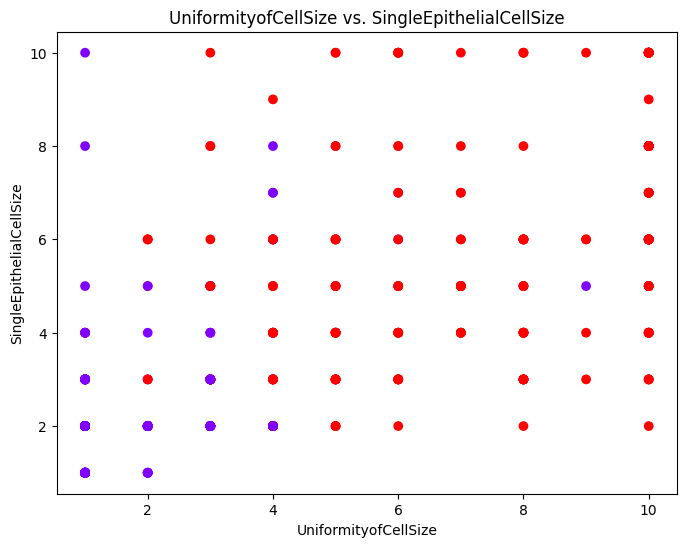

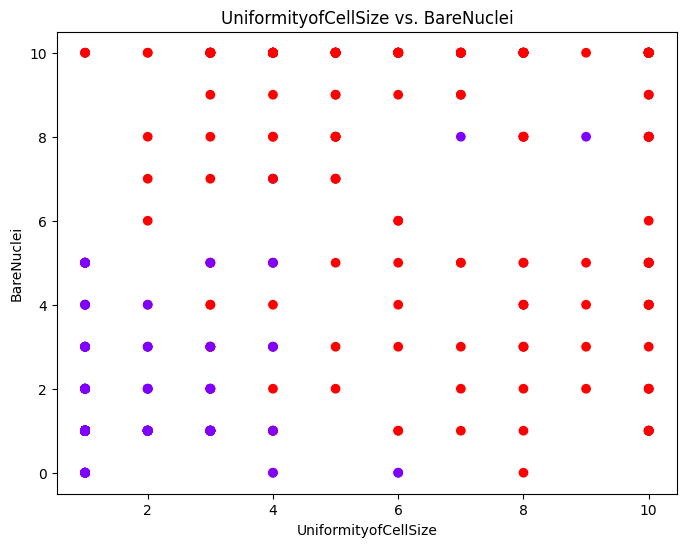

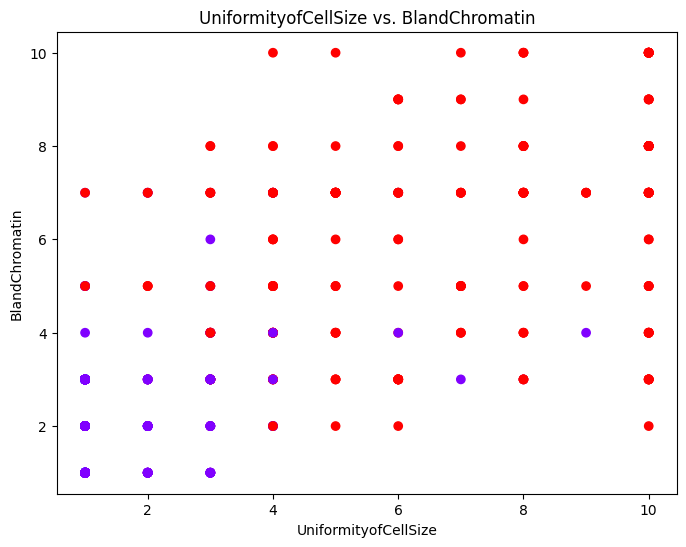

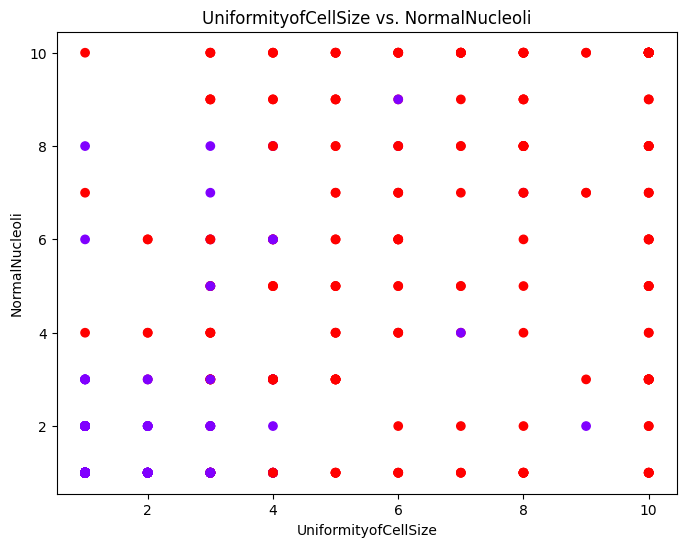

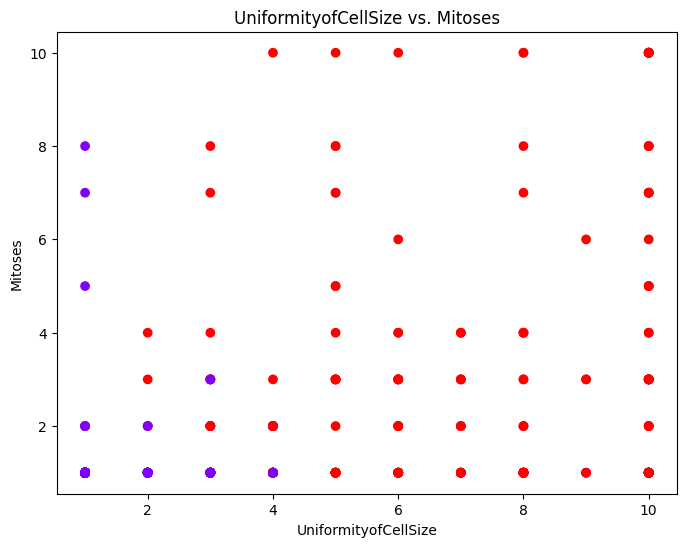

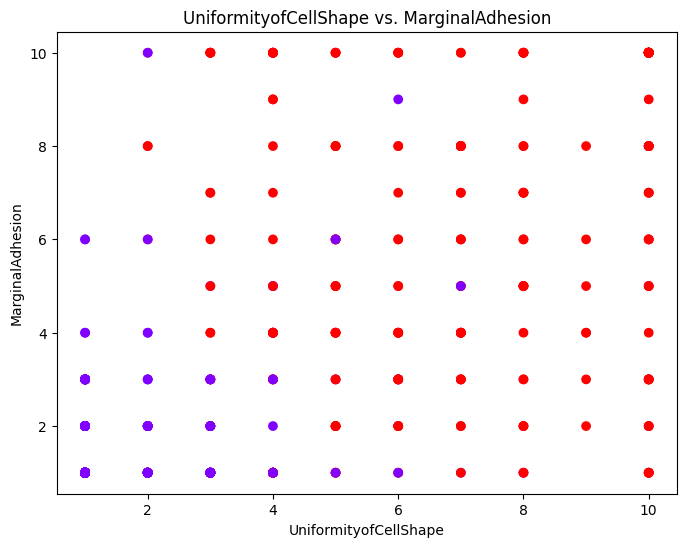

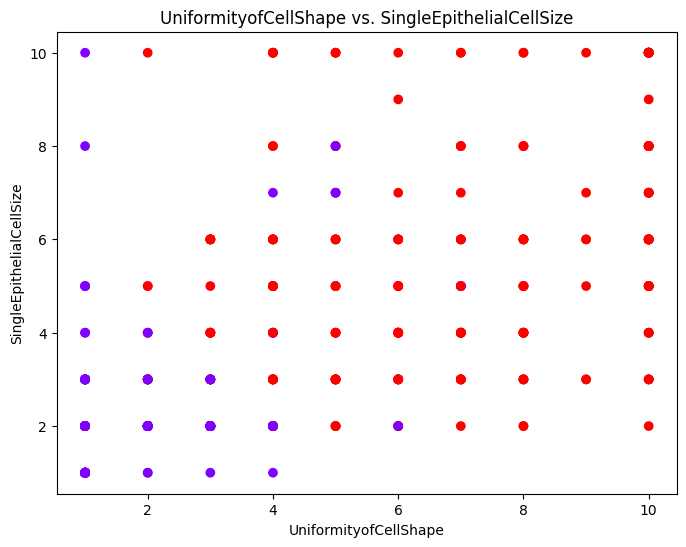

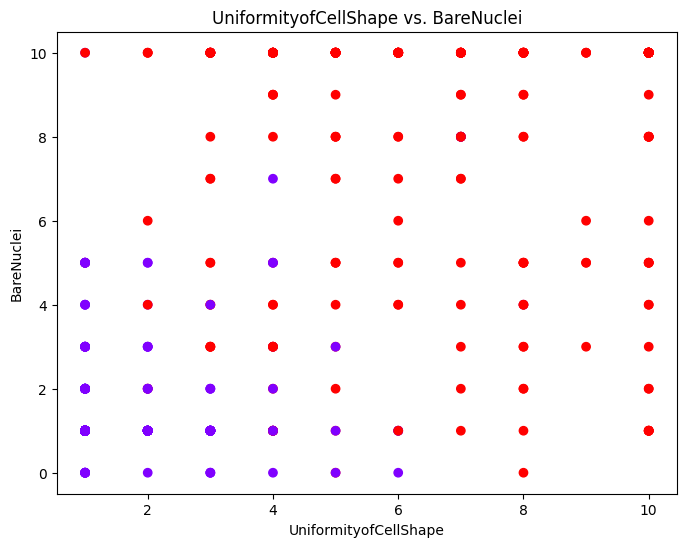

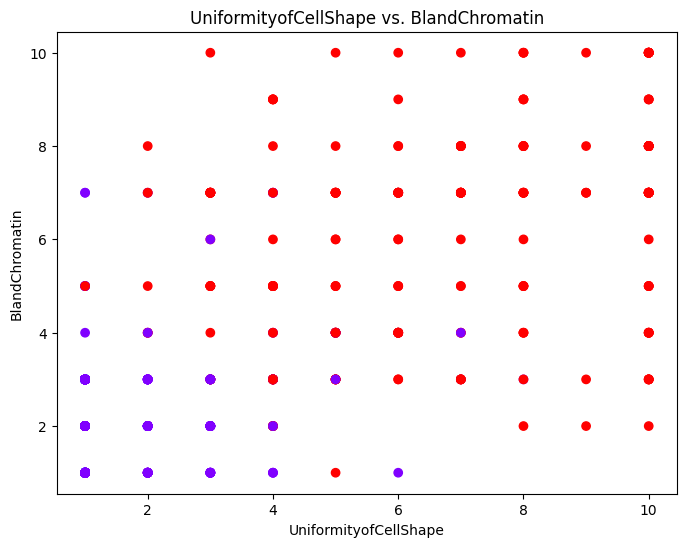

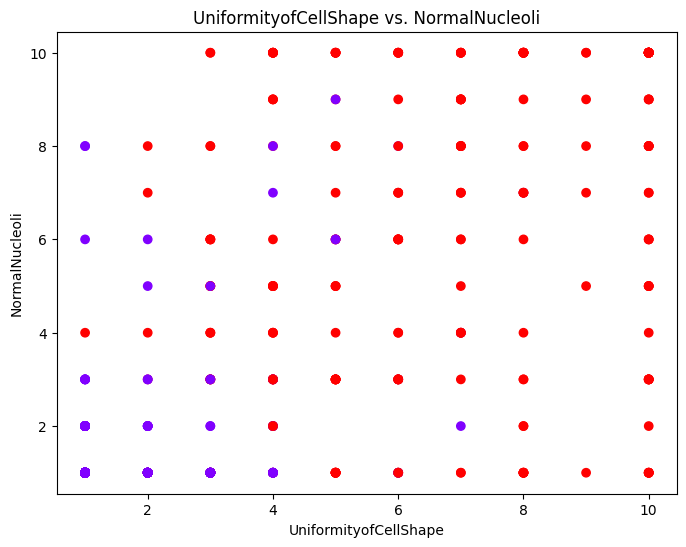

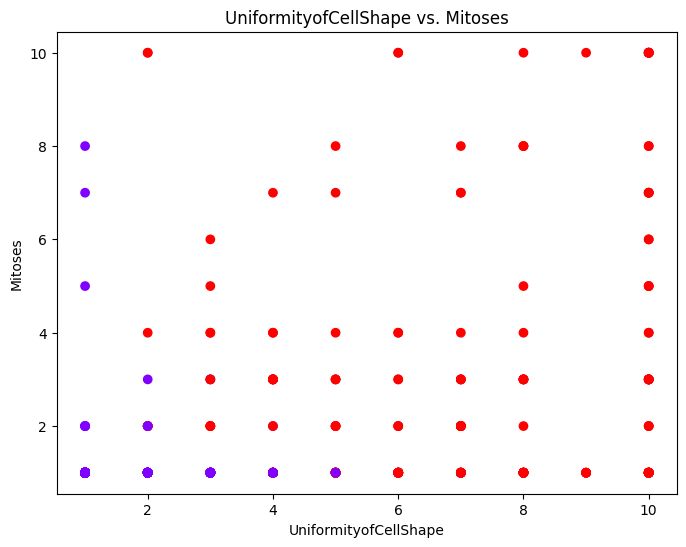

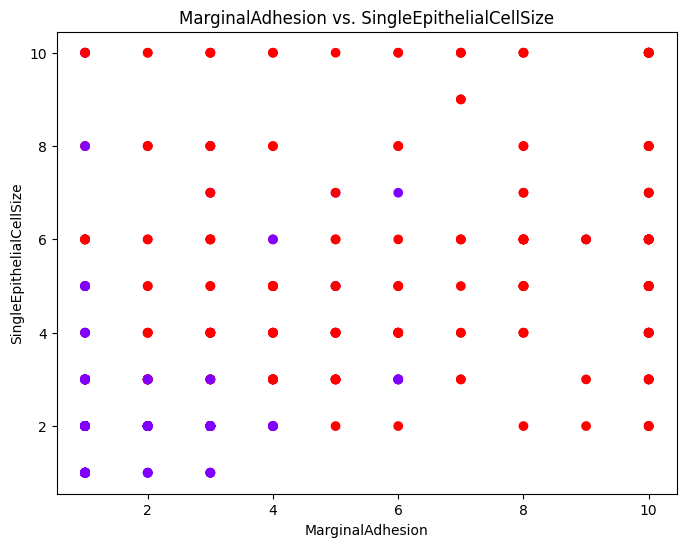

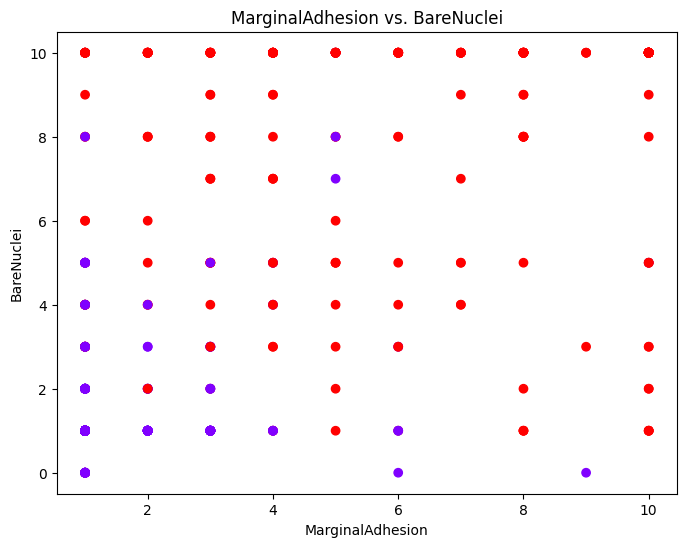

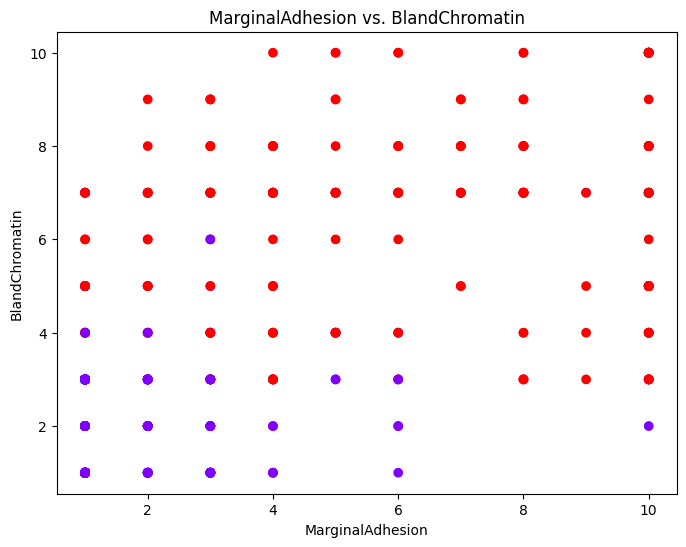

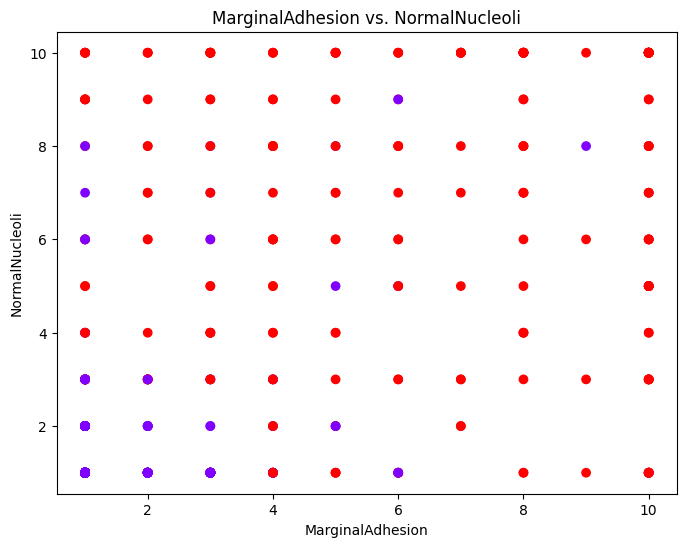

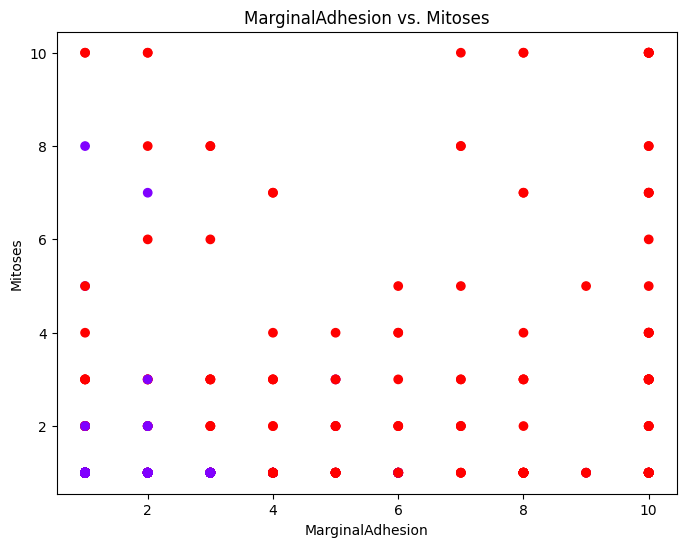

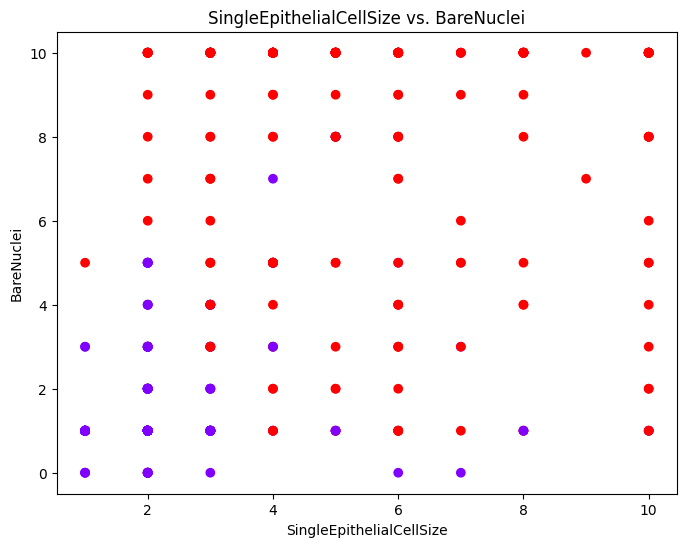

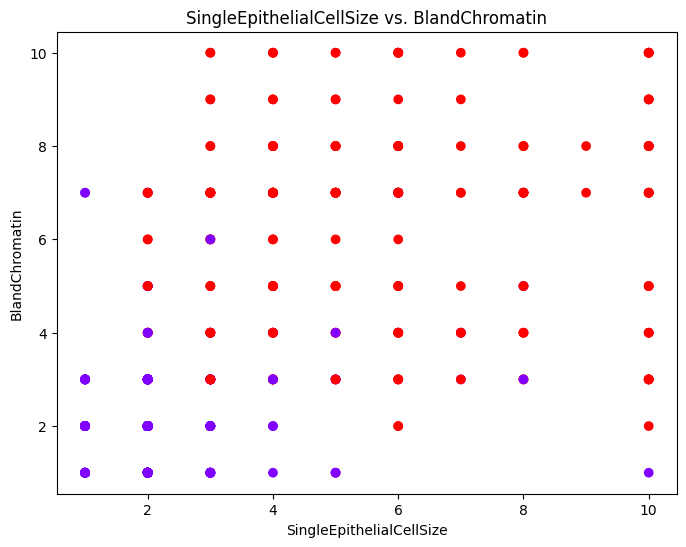

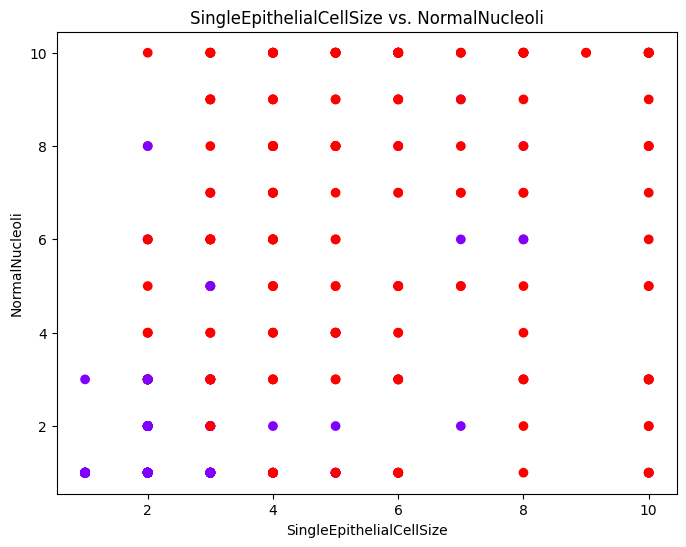

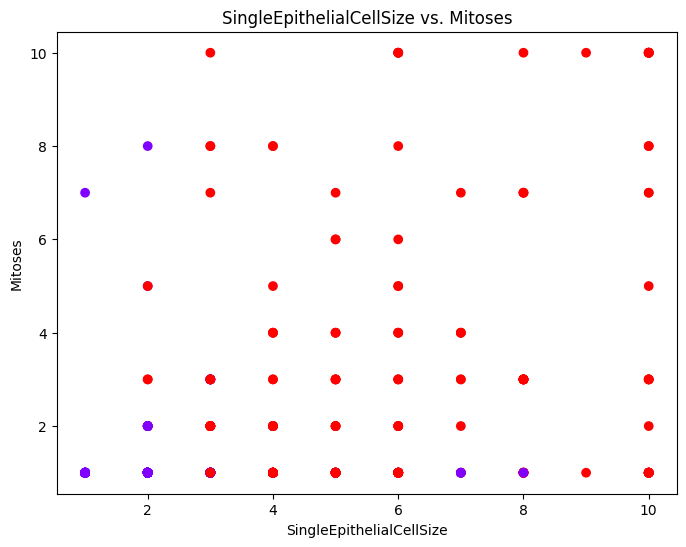

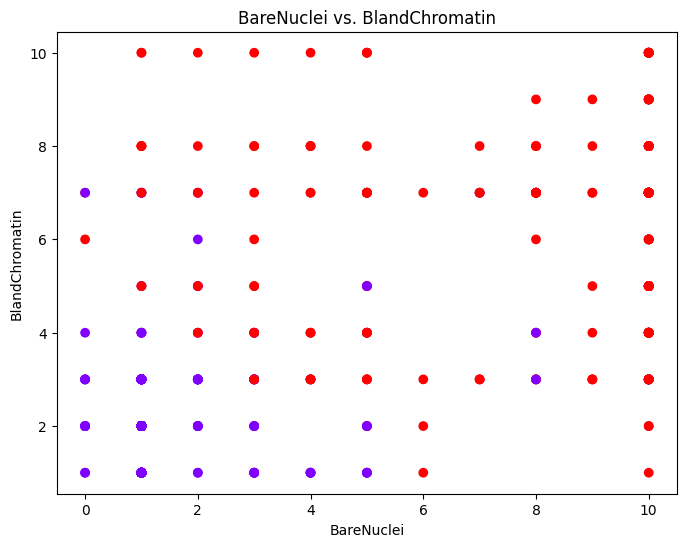

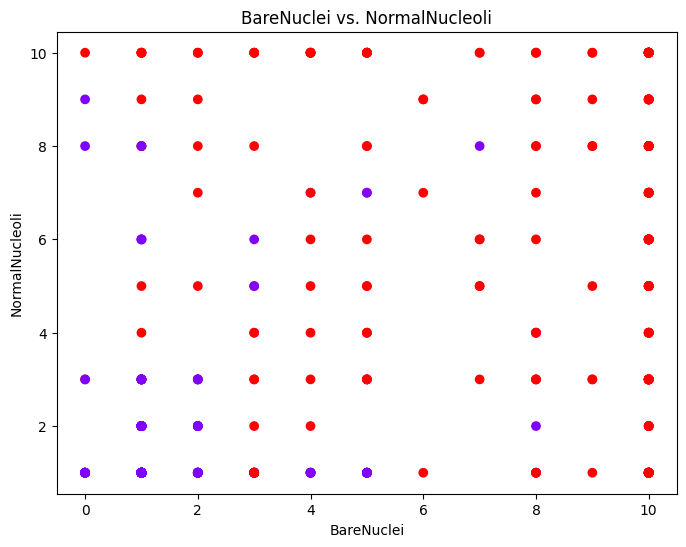

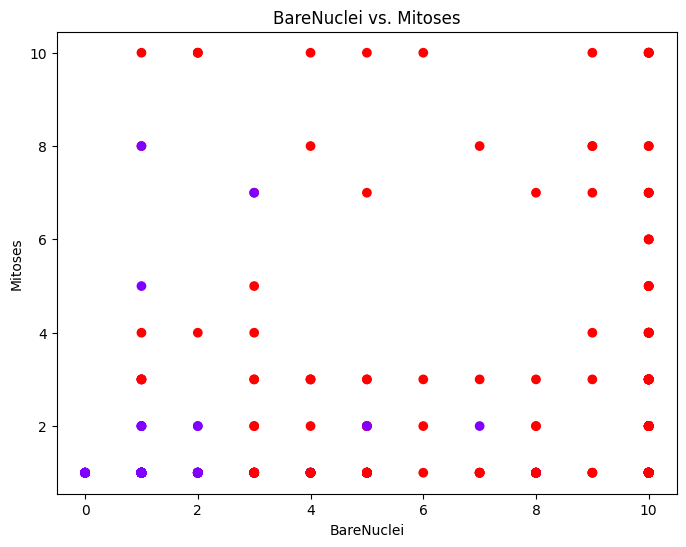

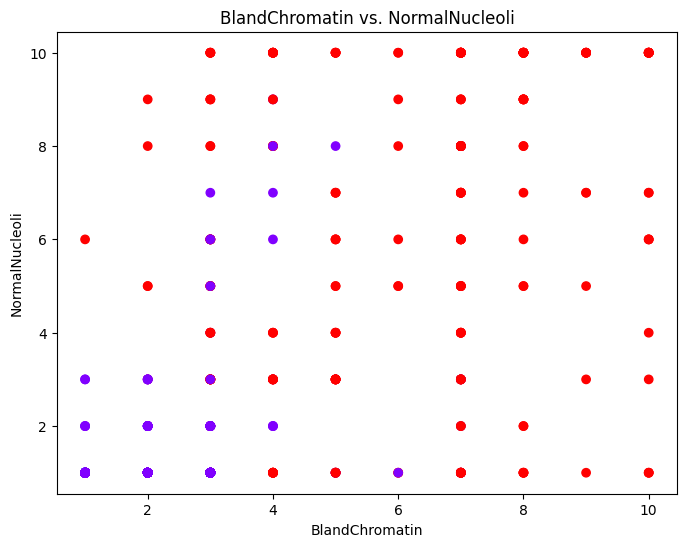

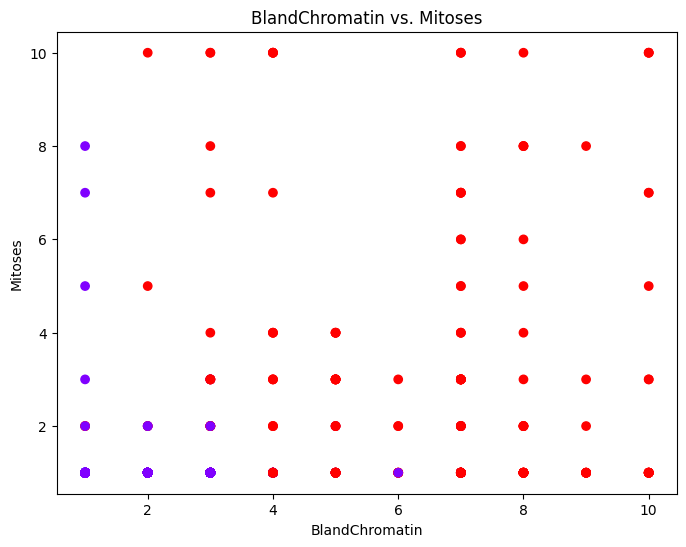

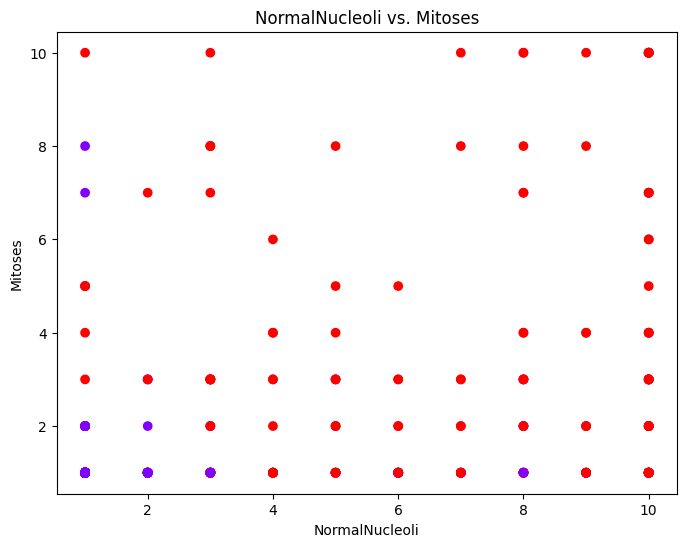

In [ ]:
#To save time, we can also use for loop to create this with only one code chunk

#Saving our features in an array to call them in our loop with i and j
feature_columns = ['clumpThickness', 'UniformityofCellSize', 'UniformityofCellShape','MarginalAdhesion', 'SingleEpithelialCellSize', 'BareNuclei',
                  'BlandChromatin', 'NormalNucleoli', 'Mitoses']

# Generate scatter plots for all combinations of two features
for i in range(len(feature_columns)):
    for j in range(i + 1, len(feature_columns)):
        plt.figure(figsize=(8, 6))
        plt.scatter(df2[feature_columns[i]], df2[feature_columns[j]], c=df2['diagnosis'], cmap='rainbow')
        plt.xlabel(feature_columns[i])
        plt.ylabel(feature_columns[j])
        plt.title(f'{feature_columns[i]} vs. {feature_columns[j]}')
        plt.show()


For an example, we are taking NormalNucleoli and BlandChromatin randomly as an input. Diagnosis is our target variable and we want to draw lines (linear or non-linear) to find the best fit for our model. Firstly we are trying when Kernel equals to linear.

***Reminder! We know that our data is not linearly seperably so "linear" is not going to be the best fit for our data points.***

In [ ]:
model2 = SVC(kernel='linear').fit(df2[['NormalNucleoli', 'BlandChromatin']],df2['diagnosis'])

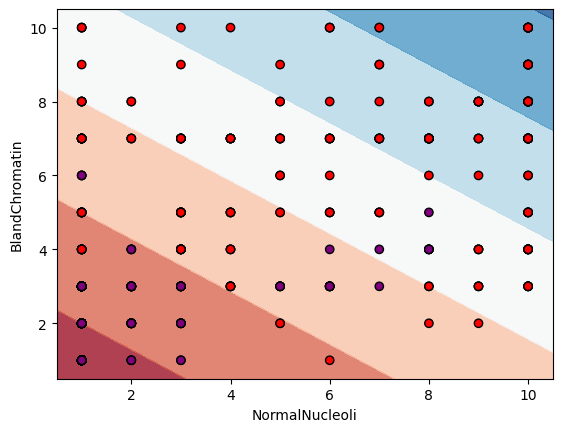

In [ ]:
#Seeing the decision boundaries with color codes in the below graph with a help of following code
DecisionBoundaryDisplay.from_estimator(model2, df2[['NormalNucleoli', 'BlandChromatin']], cmap=plt.cm.RdBu, alpha=0.8, eps=0.5)
plt.scatter(df2['NormalNucleoli'], df2['BlandChromatin'], c=df2['diagnosis'], cmap=ListedColormap(["purple", "red"]), edgecolors="k")
plt.show()

Secondly, trying "rbf" for more than 2 dimensional and nonlinear datasets. It transforms these two data points into a higher-dimensional feature space, enabling the SVM to find non-linear decision boundaries.


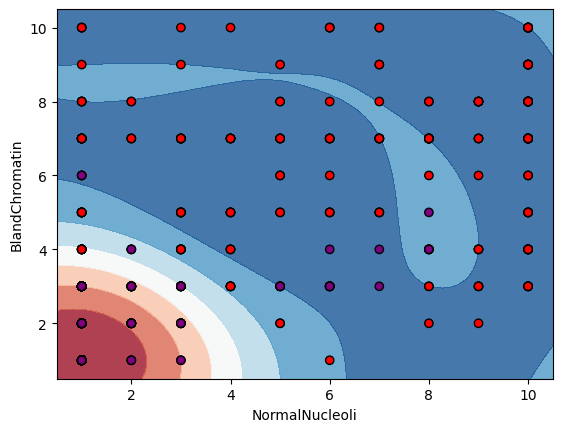

In [ ]:
model3 = SVC(kernel='rbf').fit(df2[['NormalNucleoli', 'BlandChromatin']],df2['diagnosis'])

DecisionBoundaryDisplay.from_estimator(model3, df2[['NormalNucleoli', 'BlandChromatin']], cmap=plt.cm.RdBu, alpha=0.8, eps=0.5)
plt.scatter(df2['NormalNucleoli'], df2['BlandChromatin'], c=df2['diagnosis'], cmap=ListedColormap(["purple", "red"]), edgecolors="k")
plt.show()

In [ ]:
print(len(model2.support_vectors_))

135


In [ ]:
print(len(model3.support_vectors_))

125


*As you can see in the above numbers, with rbf we have less support vectors. Rbf we are using more suitable Kernel method for our dataset.*

**Seperately, trying different values of C and adding gama value to understand how they help our model to fit.**

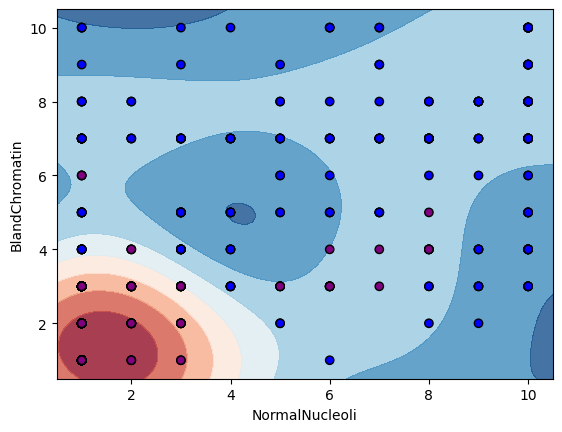

In [ ]:
model4 = SVC(kernel='rbf', C=5).fit(df2[['NormalNucleoli', 'BlandChromatin']],df2['diagnosis'])
DecisionBoundaryDisplay.from_estimator(model4, df2[['NormalNucleoli', 'BlandChromatin']], cmap=plt.cm.RdBu, alpha=0.8, eps=0.5)

plt.scatter(df2['NormalNucleoli'], df2['BlandChromatin'], c=df2['diagnosis'], cmap=ListedColormap(["purple", "blue"]), edgecolors="k")
plt.show()

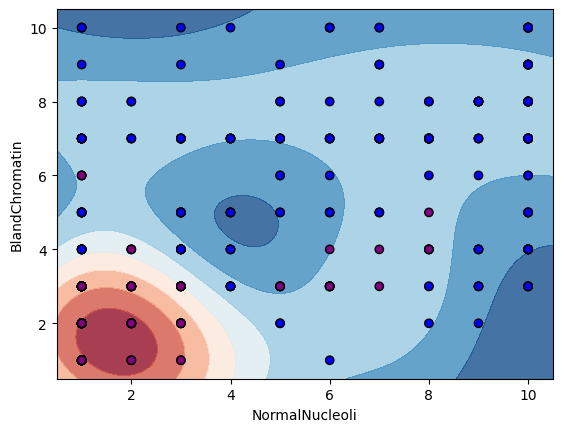

In [ ]:
model5 = SVC(kernel='rbf', C=10).fit(df2[['NormalNucleoli', 'BlandChromatin']],df2['diagnosis'])
DecisionBoundaryDisplay.from_estimator(model5, df2[['NormalNucleoli', 'BlandChromatin']], cmap=plt.cm.RdBu, alpha=0.8, eps=0.5)

plt.scatter(df2['NormalNucleoli'], df2['BlandChromatin'], c=df2['diagnosis'], cmap=ListedColormap(["purple", "blue"]), edgecolors="k")
plt.show()

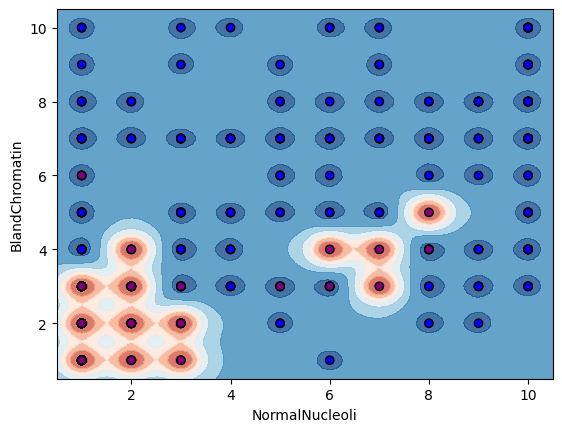

In [ ]:
model6 = SVC(kernel='rbf', C=10, gamma=5).fit(df2[['NormalNucleoli', 'BlandChromatin']],df2['diagnosis'])
DecisionBoundaryDisplay.from_estimator(model6, df2[['NormalNucleoli', 'BlandChromatin']], cmap=plt.cm.RdBu, alpha=0.8, eps=0.5)

plt.scatter(df2['NormalNucleoli'], df2['BlandChromatin'], c=df2['diagnosis'], cmap=ListedColormap(["purple", "blue"]), edgecolors="k")
plt.show()

#"rbf" with gamma parameter (model6) is more precise than other two other models (model4 and model5).

# ***Conclusion & Recommendations***

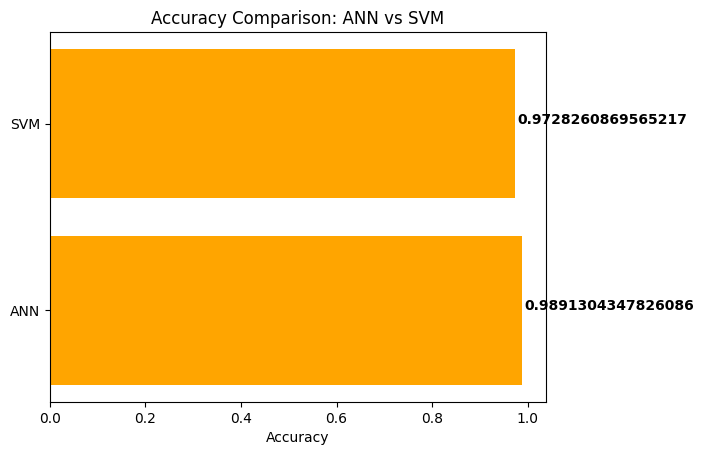

In [ ]:
# Accuracy values
Accuracy_ANN = [0.9891304347826086]  # Accuracy values for ANN
Accuracy_SVM = [0.9728260869565217]  # Accuracy values for SVM

# Creating y-values
y_values = [Accuracy_ANN[0], Accuracy_SVM[0]]

# Creating a list of labels for each bar
labels = ['ANN', 'SVM']

# Creating an array of indices for the y-axis (same length as y-values)
y_positions = range(len(y_values))

# Plotting the horizontal bar chart
plt.barh(y_positions, y_values, tick_label=labels, color="orange")

# Displaying the accuracy values on top of each bar
for i, v in enumerate(y_values):
    plt.text(v + 0.005, i, str(v), color='black', fontweight='bold')

# Setting the y-axis label
plt.xlabel('Accuracy')

# Setting the title
plt.title('Accuracy Comparison: ANN vs SVM')

# Display the plot
plt.show()


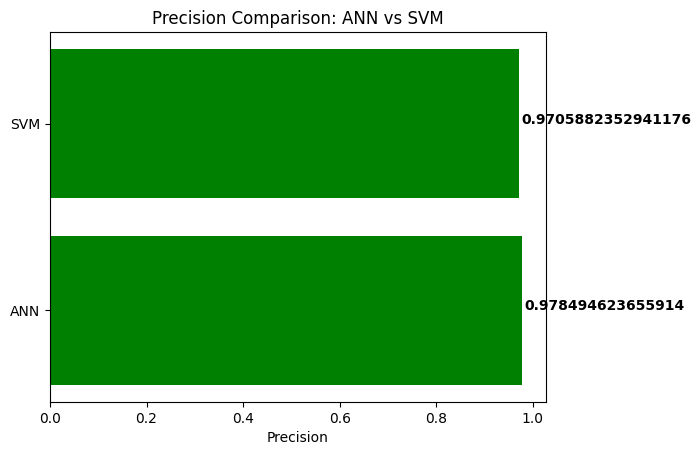

In [ ]:
# Precision values
Precision_ANN = [0.978494623655914]  # Precision values for ANN
Precision_SVM = [0.9705882352941176]  # Precisionvalues for SVM

# Creating y-values
y_values = [Precision_ANN[0], Precision_SVM[0]]

# Creating a list of labels for each bar
labels = ['ANN', 'SVM']

# Creating an array of indices for the y-axis (same length as y-values)
y_positions = range(len(y_values))

# Plotting the horizontal bar chart
plt.barh(y_positions, y_values, tick_label=labels, color="green")

# Displaying the accuracy values on top of each bar
for i, v in enumerate(y_values):
    plt.text(v + 0.005, i, str(v), color='black', fontweight='bold')

# Setting the y-axis label
plt.xlabel('Precision')

# Setting the title
plt.title('Precision Comparison: ANN vs SVM')

# Display the plot
plt.show()

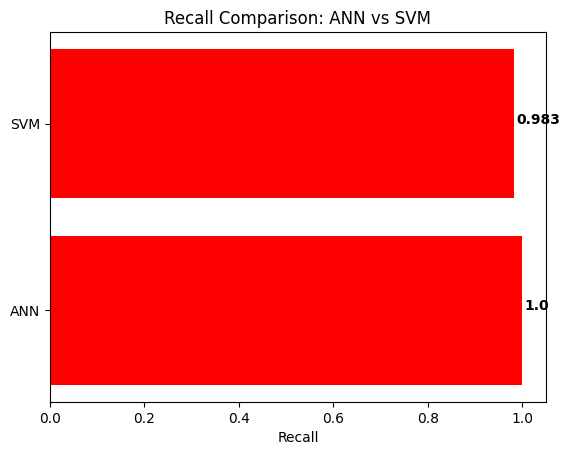

In [ ]:
# Recall values
Recall_ANN = [1.0]  # Recall values for ANN
Recall_SVM = [0.983]  # Recall values for SVM

# Creating y-values
y_values = [Recall_ANN[0], Recall_SVM[0]]

# Creating a list of labels for each bar
labels = ['ANN', 'SVM']

# Creating an array of indices for the y-axis (same length as y-values)
y_positions = range(len(y_values))

# Plotting the horizontal bar chart
plt.barh(y_positions, y_values, tick_label=labels, color="red")

# Displaying the accuracy values on top of each bar
for i, v in enumerate(y_values):
    plt.text(v + 0.005, i, str(v), color='black', fontweight='bold')

# Setting the y-axis label
plt.xlabel('Recall')

# Setting the title
plt.title('Recall Comparison: ANN vs SVM')

# Display the plot
plt.show()

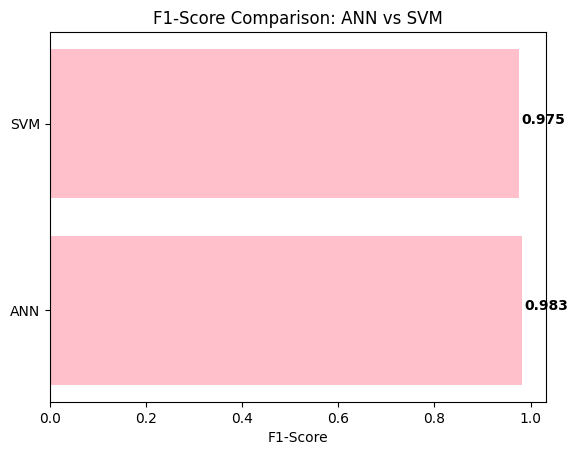

In [ ]:
# F1_Score values
F1_Score_ANN = [0.983]  # F1_Score values for ANN
F1_Score_SVM = [0.975]  # F1_Score values for SVM

# Creating y-values
y_values = [F1_Score_ANN[0], F1_Score_SVM[0]]

# Creating a list of labels for each bar
labels = ['ANN', 'SVM']

# Creating an array of indices for the y-axis (same length as y-values)
y_positions = range(len(y_values))

# Plotting the horizontal bar chart
plt.barh(y_positions, y_values, tick_label=labels,color="pink")

# Displaying the accuracy values on top of each bar
for i, v in enumerate(y_values):
    plt.text(v + 0.005, i, str(v), color='black', fontweight='bold')

# Setting the y-axis label
plt.xlabel('F1-Score')

# Setting the title
plt.title('F1-Score Comparison: ANN vs SVM')

# Display the plot
plt.show()

When we compare ANN and SVM, we see that ANN has the best performance measures. Because ANN can recognize non-linear interactions between dependent and independent variables, this is possible.

Especially when we consider our **Recall** value to be a crucial element for our analysis since we don't want to inform someone who is ill that they are not sick, ANN proves itself in that performance meausure too.